In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [3]:
data_dir = '../kaggle_data/'

In [4]:
kaggle_train = data_dir+'train.csv'

In [5]:
df = pd.read_csv(kaggle_train)
#df_train,df_cv = train_test_split(pd.read_csv(kaggle_train))

In [6]:
#df_train.sortlevel()

In [53]:
person_id = df['ID']
y_df = df['target']
y_df.index = df['ID']
category_features = ['v24','v30','v31','v47','v52','v56','v66',\
                     'v74','v75','v79','v91','v107','v110','v112','v113','v125']
complicated_category_features = ['v3','v22','v52','v71']
integer_features = ['v38','v62','v72','v129']

non_numeric = ['ID','target']+category_features+integer_features+complicated_category_features
numeric_features = []
for c in df.columns:
    if c not in non_numeric:
        numeric_features.append(c)


In [54]:
df_cat = df[category_features]
df_cat.index = df['ID']

In [55]:
df_cat = pd.get_dummies(df_cat,dummy_na=True)

In [56]:
# for c in df_cat.columns.values:
#     print(c)
#     print(df_cat[c].value_counts())

In [57]:
df_num = df[numeric_features]


In [58]:
for c in df_num.columns.values:
    df_num[c] = df_num[c].fillna(df_num[c].mean())
df_num.index = df['ID']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [66]:
X_df = df_num.merge(df_cat,how='inner',left_index=True,right_index=True)


In [79]:
X_df['Target'] = y_df.values

In [80]:
df_train,df_test = train_test_split(X_df)

In [84]:
y_df_train = df_train['Target']
X_df_train = df_train.drop(['Target'],axis=1)


In [85]:
X_train = X_df_train.values
y_train = y_df_train.values

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

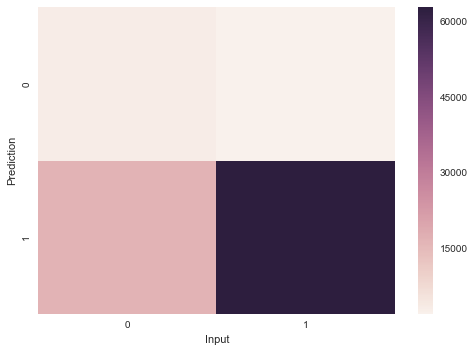

In [90]:
# Predictions on training
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(clf.predict(X_train),y_train))
ax.set_xlabel('Input')
ax.set_ylabel('Prediction')
